In [2]:
import pandas as pd
df = pd.read_csv("/home/yair/Documents/Bar-Ilan/third-year/semester2/Statistical-Theory/heart_disease_dataset.csv")
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,Nothing,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,Nothing,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,Nothing,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1000 non-null   int64 
 1   Gender                   1000 non-null   object
 2   Cholesterol              1000 non-null   int64 
 3   Blood Pressure           1000 non-null   int64 
 4   Heart Rate               1000 non-null   int64 
 5   Smoking                  1000 non-null   object
 6   Alcohol Intake           1000 non-null   object
 7   Exercise Hours           1000 non-null   int64 
 8   Family History           1000 non-null   object
 9   Diabetes                 1000 non-null   object
 10  Obesity                  1000 non-null   object
 11  Stress Level             1000 non-null   int64 
 12  Blood Sugar              1000 non-null   int64 
 13  Exercise Induced Angina  1000 non-null   object
 14  Chest Pain Type          1000 non-null   

### Find correlation of numerical features with heart disease

In [4]:
from scipy.stats import pearsonr, spearmanr, pointbiserialr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
numerical_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Remove label from numerical features list
numerical_features.remove('Heart Disease')

# Correlation with numerical features using Pearson and Spearman
num_corr_pearson = {}
num_corr_spearman = {}
num_corr_pointbiserial = {}

p_values_pearson = {}
p_values_spearman = {}
p_values_pointbiserial = {}

for feature in numerical_features:
    # Pearson correlation
    pearson_corr, pearson_p = pearsonr(df[feature], df['Heart Disease'])
    num_corr_pearson[feature] = pearson_corr
    p_values_pearson[feature] = pearson_p

    # Spearman correlation
    spearman_corr, spearman_p = spearmanr(df[feature], df['Heart Disease'])
    num_corr_spearman[feature] = spearman_corr
    p_values_spearman[feature] = spearman_p

    # Point-Biserial correlation
    pointbiserial_corr, pointbiserial_p = pointbiserialr(df[feature], df['Heart Disease'])
    num_corr_pointbiserial[feature] = pointbiserial_corr
    p_values_pointbiserial[feature] = pointbiserial_p

# Display the results
print("Pearson Correlation:")
for feature in numerical_features:
    significance = "Significant" if p_values_pearson[feature] < 0.05 else "Not Significant"
    print(f"{feature}: Pearson's r = {num_corr_pearson[feature]:.4f}, p-value = {p_values_pearson[feature]:.4f} ({significance})")

print("\nSpearman Correlation:")
for feature in numerical_features:
    significance = "Significant" if p_values_spearman[feature] < 0.05 else "Not Significant"
    print(f"{feature}: Spearman's rho = {num_corr_spearman[feature]:.4f}, p-value = {p_values_spearman[feature]:.4f} ({significance})")

print("\nPoint-Biserial Correlation:")
for feature in numerical_features:
    significance = "Significant" if p_values_pointbiserial[feature] < 0.05 else "Not Significant"
    print(f"{feature}: Point-Biserial r = {num_corr_pointbiserial[feature]:.4f}, p-value = {p_values_pointbiserial[feature]:.4f} ({significance})")


Pearson Correlation:
Age: Pearson's r = 0.6469, p-value = 0.0000 (Significant)
Cholesterol: Pearson's r = 0.3650, p-value = 0.0000 (Significant)
Blood Pressure: Pearson's r = 0.0069, p-value = 0.8275 (Not Significant)
Heart Rate: Pearson's r = 0.0132, p-value = 0.6765 (Not Significant)
Exercise Hours: Pearson's r = -0.0142, p-value = 0.6532 (Not Significant)
Stress Level: Pearson's r = 0.0071, p-value = 0.8233 (Not Significant)
Blood Sugar: Pearson's r = -0.0130, p-value = 0.6813 (Not Significant)

Spearman Correlation:
Age: Spearman's rho = 0.6514, p-value = 0.0000 (Significant)
Cholesterol: Spearman's rho = 0.3668, p-value = 0.0000 (Significant)
Blood Pressure: Spearman's rho = 0.0070, p-value = 0.8241 (Not Significant)
Heart Rate: Spearman's rho = 0.0125, p-value = 0.6918 (Not Significant)
Exercise Hours: Spearman's rho = -0.0144, p-value = 0.6499 (Not Significant)
Stress Level: Spearman's rho = 0.0074, p-value = 0.8162 (Not Significant)
Blood Sugar: Spearman's rho = -0.0144, p-valu

### Finding correlations of categorial features with heart disease

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame and categorical_features is a list of your categorical feature names
# Example: categorical_features = ['Feature1', 'Feature2', 'Feature3']

cat_corr = {}
p_values = {}
for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['Heart Disease'])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()  # Total number of observations
    phi2 = chi2 / n
    r, k = contingency_table.shape
    # Calculating Cramer's V
    cramer_v = np.sqrt(phi2 / min(k-1, r-1))
    cat_corr[feature] = cramer_v
    p_values[feature] = p

# Display the results
for feature in categorical_features:
    significance = "Significant" if p_values[feature] < 0.05 else "Not Significant"
    print(f"{feature}: Cramer's V = {cat_corr[feature]:.4f}, p-value = {p_values[feature]:.4f} ({significance})")


Gender: Cramer's V = 0.0274, p-value = 0.3871 (Not Significant)
Smoking: Cramer's V = 0.0909, p-value = 0.0161 (Significant)
Alcohol Intake: Cramer's V = 0.0640, p-value = 0.1294 (Not Significant)
Family History: Cramer's V = 0.0282, p-value = 0.3719 (Not Significant)
Diabetes: Cramer's V = 0.0145, p-value = 0.6465 (Not Significant)
Obesity: Cramer's V = 0.0168, p-value = 0.5946 (Not Significant)
Exercise Induced Angina: Cramer's V = 0.0020, p-value = 0.9508 (Not Significant)
Chest Pain Type: Cramer's V = 0.0493, p-value = 0.4885 (Not Significant)


#### Just a quick explantion: Cramér's V is measurment of association between two categorial variables, and it's giving out a value between 0 to 1, the higher you are, the more correlated the variables are.

#### It's defined as: $$V=\sqrt{\frac{\chi^{2}/n}{\min\left(k-1,r-1\right)}}$$

#### For k and r that represent the numer of options each categorial variable has.

### Print correlations

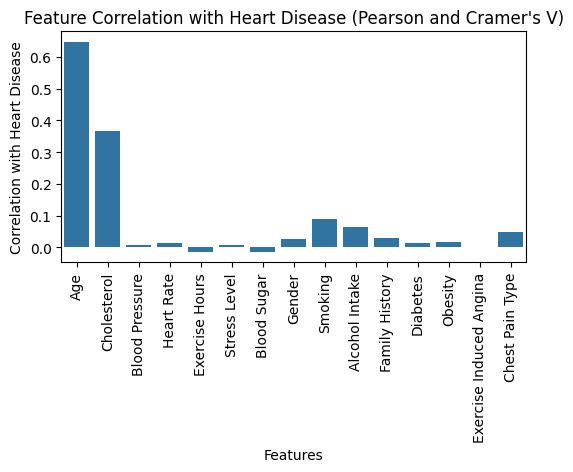

In [6]:
# Combine Pearson and Cramer's V correlations into a single dictionary
combined_correlations = {}

# Add Pearson correlations
for feature in numerical_features:
    combined_correlations[feature] = num_corr_pearson[feature]

# Add Cramer's V correlations
for feature in categorical_features:
    combined_correlations[feature] = cat_corr[feature]

# Create a DataFrame for better plotting
correlation_df = pd.DataFrame(list(combined_correlations.items()), columns=['Feature', 'Correlation'])

# Plotting
plt.figure(figsize=(6, 3))
sns.barplot(x='Feature', y='Correlation', data=correlation_df)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Features')
plt.ylabel('Correlation with Heart Disease')
plt.title('Feature Correlation with Heart Disease (Pearson and Cramer\'s V)')
plt.show()

#### We saw that there is a significance correlation between Smoking, Age and Cholesterol. Let's try to pinpoint how does those three featues affect heart disease.